In [0]:
from fastai.vision import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

# File Setup

In [0]:
folder = 'pachirisu'
file = 'pachirisu.csv'

In [0]:
folder = 'emolga'
file = 'emolga.csv'

In [0]:
folder = 'plusle and minun'
file = 'plusle and minun.csv'

In [0]:
folder = 'dedenne'
file = 'dedenne.csv'

In [0]:
path = Path(base_dir + 'data/pokemon')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
path.ls()

[PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/pokemon/pachirisu'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/pokemon/emolga'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/pokemon/models'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/pokemon/export.pkl'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/pokemon/plusle and minun'),
 PosixPath('/content/gdrive/My Drive/Colab Notebooks/data/pokemon/dedenne')]

In [0]:
classes = ['pachirisu', 'emolga', 'plusle and minun', 'dedenne']

# Download Images

In [0]:
download_images(path/folder/file, dest, max_pics=200)

Process Process-52:
Process Process-51:
Process Process-48:
Traceback (most recent call last):
Process Process-47:
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-49:
Traceback (most recent call last):
Process Process-46:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py"

KeyboardInterrupt: ignored

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

#View the Data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# #If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['dedenne', 'emolga', 'pachirisu', 'plusle and minun']

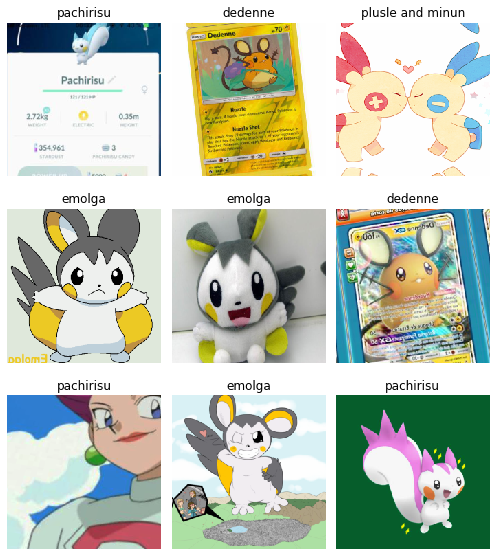

In [16]:
data.show_batch(rows=3, figsize=(7,8))

# Train Model

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 98.5MB/s]


In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.157192,0.858650,0.321839,00:10
1,1.289719,0.244922,0.068966,00:08
2,0.904737,0.139165,0.045977,00:08
3,0.694155,0.125800,0.045977,00:08


In [0]:
learn.save('pikachu-clone-stage-1.1')

In [0]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


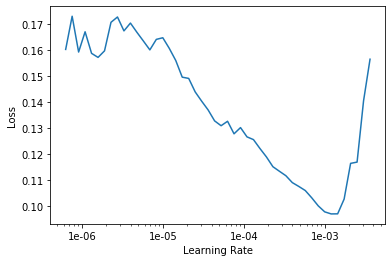

In [27]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.139953,0.102298,0.022989,00:09
1,0.100832,0.117294,0.022989,00:09


In [0]:
learn.save('pikachu-clone-stage-2.2')

# Interpretation

In [0]:
learn.load('flower-stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

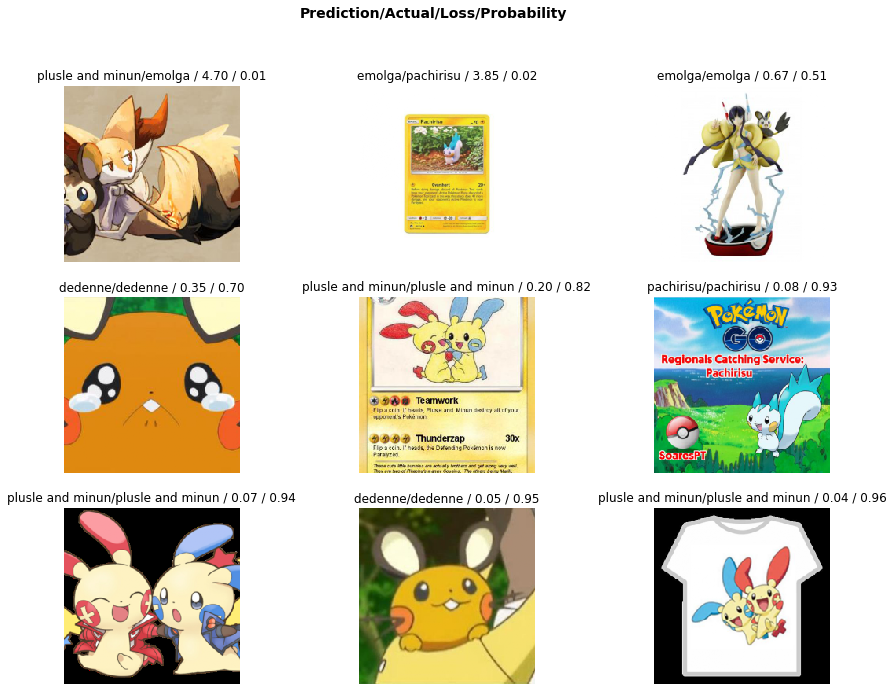

In [31]:
interp.plot_top_losses(9, figsize=(15,11))

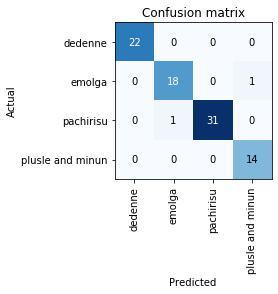

In [32]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(min_val=1)

[('pachirisu', 'emolga', 2), ('emolga', 'pachirisu', 1)]

# Cleaning Up

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

In [35]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('pikachu-clone-stage-2');

RuntimeError: ignored

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path)

# Production

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

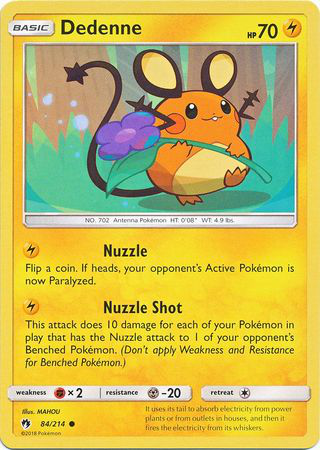

In [49]:
img = open_image(path/'dedenne'/'00000005.jpg')
img

In [0]:
learn = load_learner(path)

In [50]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category dedenne